# 1. Pretrain LSTM Model on Antiviral Dataset

In [1]:
from Data_processing import SequenceHandler
from LSTM_model import Model, save_model_instance, load_model_instance

In [2]:
def set_parameters():
    parameters = {
        "sample": 200,
        "temp": 1.25,
        "maxlen": 0,
        "epochs": 100,
        "cell": "LSTM",
        "batch_size": 128,
        "layers": 2,
        "neurons": 256,
        "dropout": 0.1,
        "valsplit": 0.2,
        "startchar": "B",
        "learning_rate": 0.01,
        "cv": None,
        "target": "all",
        "window": 0,
        "step": 1,
        "padlen": 0,
        "refs": True,
        "l2": None
    }
    return parameters

def load_and_preprocess_data(dataset, parameters):
    data = SequenceHandler(window=parameters["window"], step=parameters["step"], refs=parameters["refs"])
    data.load_sequences(dataset)
    data.analyze_training()
    data.pad_sequences(pad_char=' ', padlen=parameters["padlen"])
    data.one_hot_encode(target=parameters["target"])
    return data

def build_and_train_model(data, parameters, name, modfile=None):
    model = Model(
        n_vocab=len(data.vocab),
        outshape=len(data.vocab),
        session_name=name,
        n_units=parameters["neurons"],
        batch=parameters["batch_size"],
        layers=parameters["layers"],
        cell=parameters["cell"],
        loss='categorical_crossentropy',
        learning_rate=parameters["learning_rate"],
        dropoutfract=parameters["dropout"],
        l2_reg=parameters["l2"],
        ask=True,
        seed=42
    )
    print("Model built!")
    if modfile:
        print("Loading pretrained model................")
        model.load_model(modfile)
    print("\nTRAINING MODEL FOR %i EPOCHS...\n" % parameters["epochs"])
    model.train(data.X, data.y, epochs=parameters["epochs"], valsplit=parameters["valsplit"], sample=0, patience=5)
    model.plot_losses()
    save_model_instance(model)
    return model

def generate_and_save_data(model, data, sample, startchar, maxlen, temp):
    print("\nSampling %i Sequences...\n" % sample)
    data.generated = model.sample(sample, start=startchar, maxlen=maxlen, show=True, temp=temp)
    data.analyze_generated(sample, fname=model.logdir + f'/analysis_temp{temp}.txt', plot=True)
    data.save_generated(model.logdir, model.logdir + f'/sampled_sequences_temp{temp}.csv')


Length distribution of pretraining data:

Number of sequences:    	2716
Mean sequence length:   	19.0 ± 9.2
Median sequence length: 	17
Minimal sequence length:	4
Maximal sequence length:	42

Data shape:
X: (2716, 42, 22)
y: (2716, 42, 22)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, None, 256)         285696    
                                                                 
 LSTM2 (LSTM)                (None, None, 256)         525312    
                                                                 
 dense (Dense)               (None, None, 22)          5654      
                                                                 
Total params: 816,662
Trainable params: 816,662
Non-trainable params: 0
_________________________________________________________________
Model built!

TRAINING MODEL FOR 100 EPOCHS...

17/17 [==================

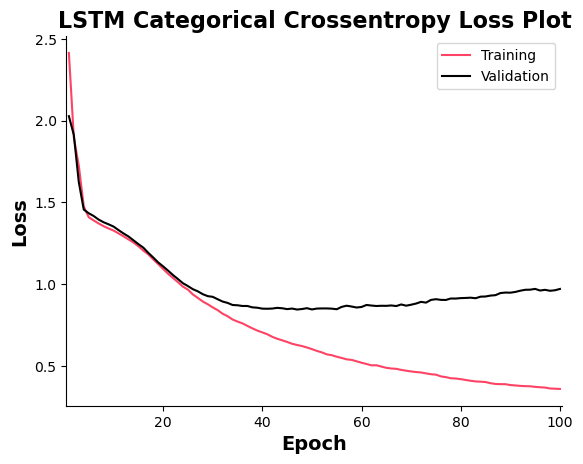

In [2]:
parameters = set_parameters()
pretrained_data = load_and_preprocess_data("data/Antiviral_pretrain_dataset.csv", parameters)
pretrained_model = build_and_train_model(pretrained_data, parameters, "Antiviral_pretrained_model")


Sampling 200 Sequences...


Sampling...

1/1 [==============================] - 0s 62ms/step
LSNIKENKCNGTDAKVKLIKQELDKYKNAVTE
1/1 [==============================] - 0s 34ms/step
SWLRDIWDWKCEVLSDFK
1/1 [==============================] - 0s 36ms/step
GIACQFLFGAGIRIAFETQSE
1/1 [==============================] - 0s 25ms/step
VRVYA
1/1 [==============================] - 0s 37ms/step
AISGIKDFLSKNNVQ
1/1 [==============================] - 0s 49ms/step
KVINPRPCPGSPPLPFVRLLLRLVFLLSCH
1/1 [==============================] - 0s 59ms/step
VRLASHLRKLRKRLLRDADDL
1/1 [==============================] - 0s 42ms/step
ADLEVVAATYVDDD
1/1 [==============================] - 0s 34ms/step
CEDQRQLPRC
1/1 [==============================] - 0s 27ms/step
RRRRR
1/1 [==============================] - 0s 39ms/step
HRILMRIRQMMT
1/1 [==============================] - 0s 34ms/step
SWFASTGPSPGP
1/1 [==============================] - 0s 45ms/step
NQPRHKFDGGRAIHYQ
1/1 [==============================] - 0s 41ms/step
LEAIPM

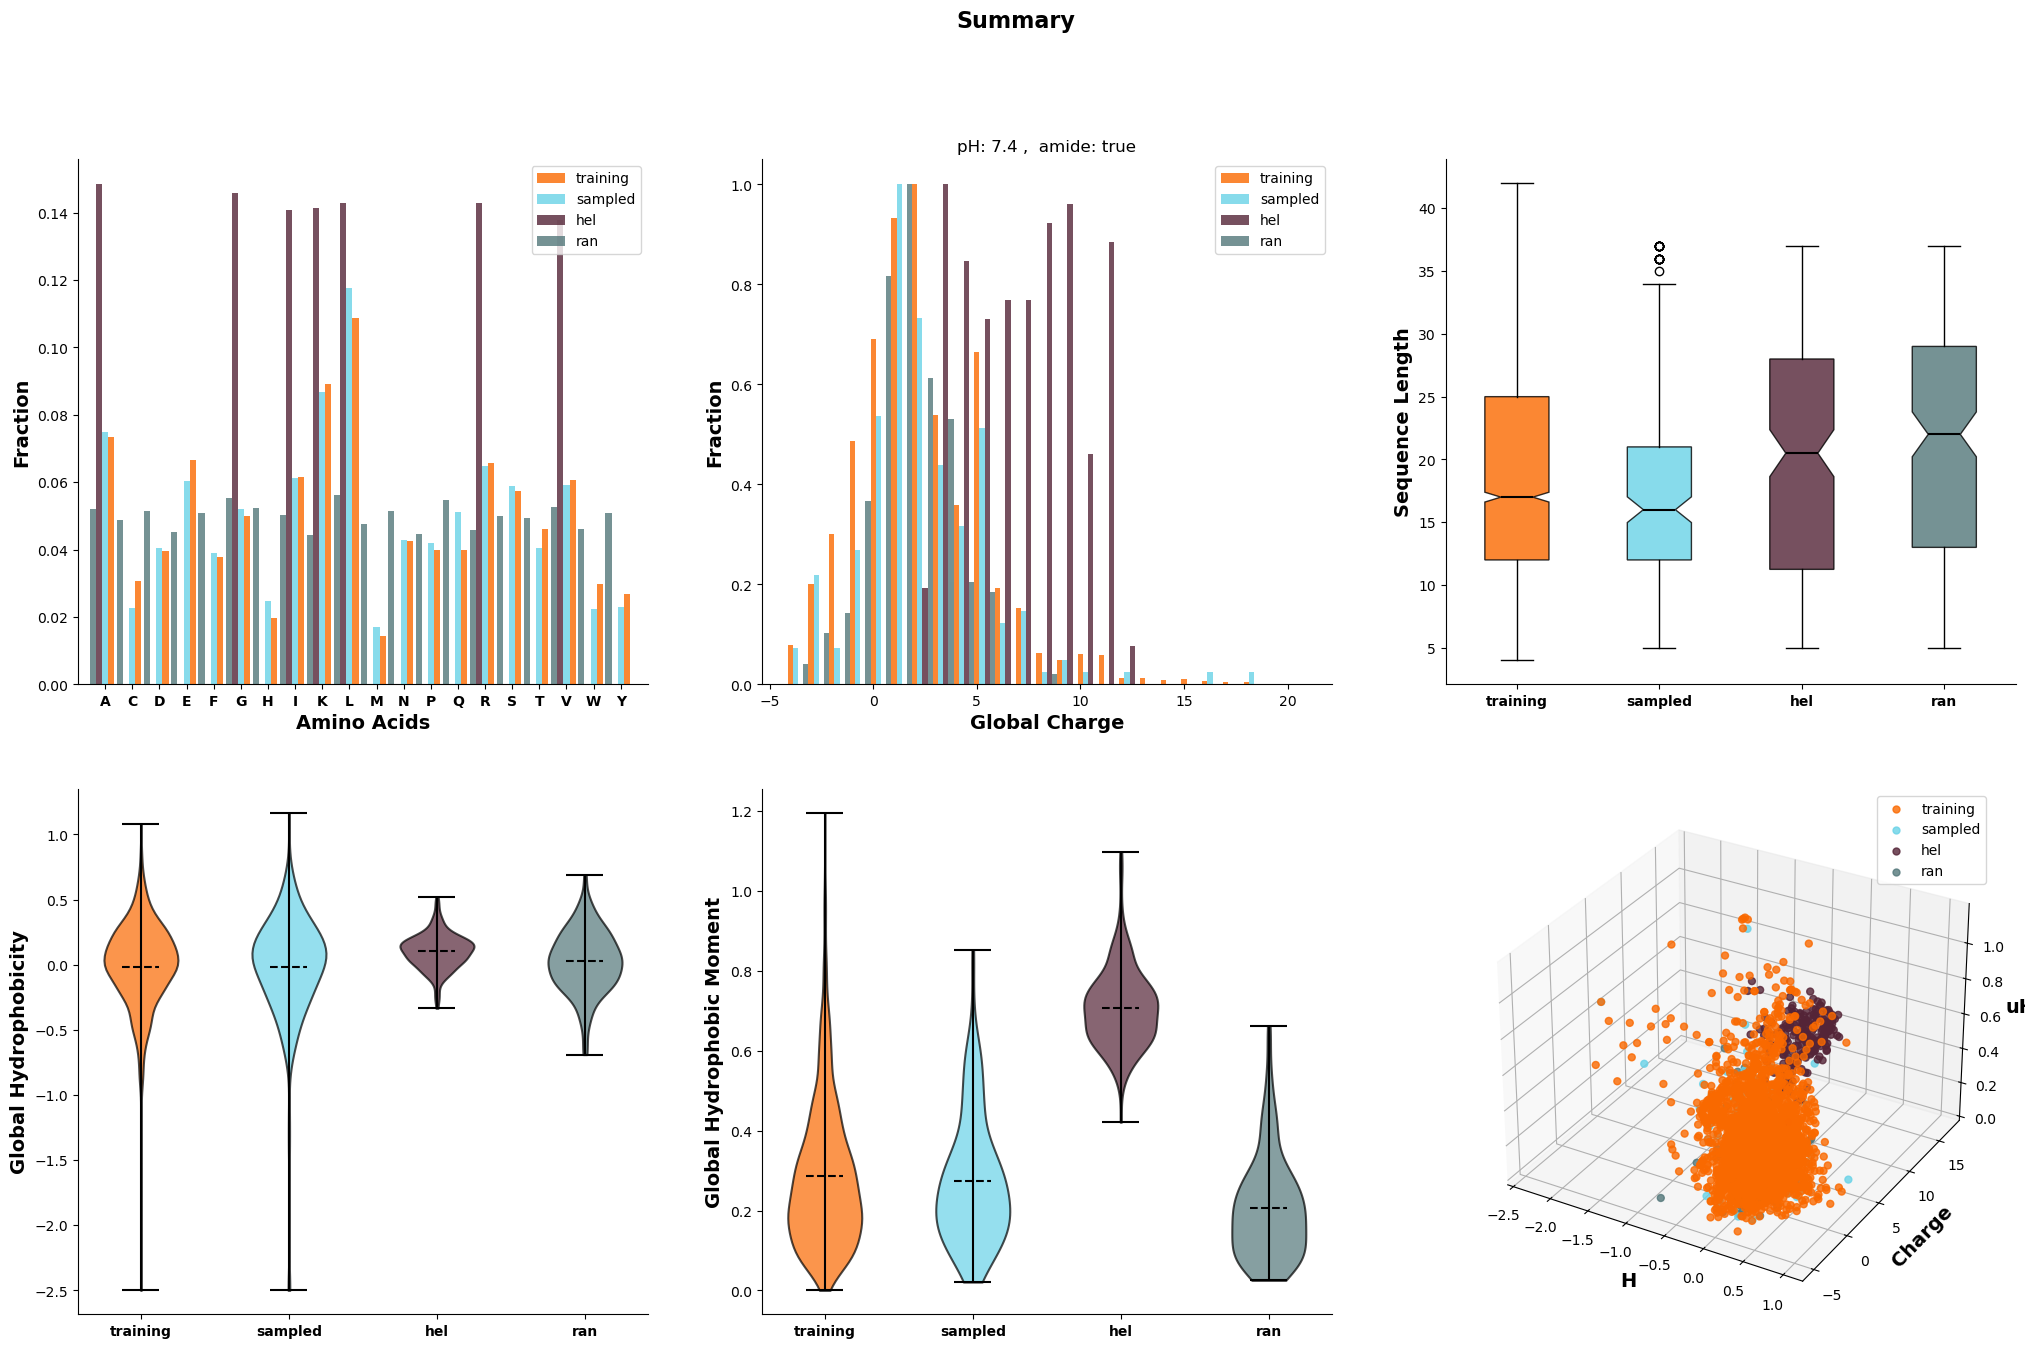

In [3]:
# 使用函数生成并保存数据
generate_and_save_data(pretrained_model, pretrained_data, sample = 200, startchar = "B", maxlen = 0, temp = 1.25)

# 2. Fine-tune LSTM Model on NS3 Dataset    


Length distribution of pretraining data:

Number of sequences:    	185
Mean sequence length:   	14.4 ± 6.3
Median sequence length: 	13
Minimal sequence length:	4
Maximal sequence length:	40

Data shape:
X: (185, 40, 22)
y: (185, 40, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, None, 256)         285696    
                                                                 
 LSTM2 (LSTM)                (None, None, 256)         525312    
                                                                 
 dense_1 (Dense)             (None, None, 22)          5654      
                                                                 
Total params: 816,662
Trainable params: 816,662
Non-trainable params: 0
_________________________________________________________________
Model built!
Loading pretrained model................

TRAINING MODEL FOR 

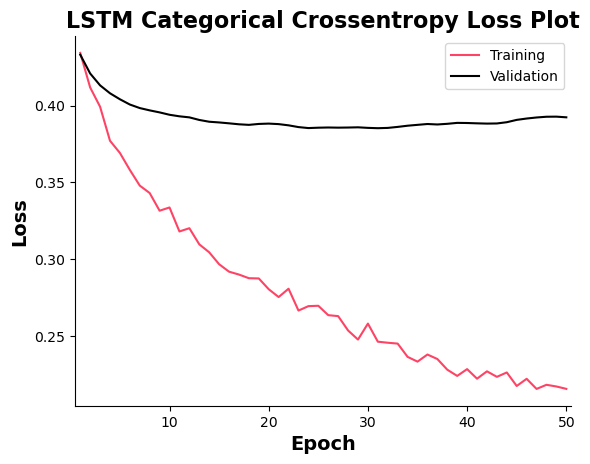

In [5]:
def set_finetune_parameters():
    fine_tune_parameters = {
        "sample": 500,
        "temp": 1.25,
        "maxlen": 0,
        "epochs": 50,  # Increase the number of epochs for fine-tuning
        "cell": "LSTM",
        "batch_size": 64,  # Decrease the batch size for fine-tuning
        "layers": 2,
        "neurons": 256,
        "dropout": 0.1,
        "valsplit": 0.2,
        "startchar": "B",
        "learning_rate": 0.001,  # Decrease the learning rate for fine-tuning
        "cv": None,
        "target": "all",
        "window": 0,
        "step": 1,
        "padlen": 0,
        "refs": True,
        "l2": None
    }
    return fine_tune_parameters

# Use the new set of parameters for fine-tuning
finetune_parameters = set_finetune_parameters()
finetune_data = load_and_preprocess_data("data/NS3_finetune_dataset.csv", finetune_parameters)
finetune_model = build_and_train_model(finetune_data, finetune_parameters, "NS3_finetune_model", 'Antiviral_pretrained_model/checkpoint/best_model_epochs.hdf5')


Sampling 500 Sequences...


Sampling...

1/1 [==============================] - 0s 47ms/step
KKKKLLAATYVFV
1/1 [==============================] - 0s 28ms/step
HCSLFKDF
1/1 [==============================] - 0s 37ms/step
DDSVVCAAVSYSHA
1/1 [==============================] - 0s 27ms/step
KKKKVVAALYVLF
1/1 [==============================] - 0s 32ms/step
RDISVNIYNSIKENQCN
1/1 [==============================] - 0s 26ms/step
KKKKVVAKEYVL
1/1 [==============================] - 0s 33ms/step
SKKRVLAGAA
1/1 [==============================] - 0s 48ms/step
ADLEVVAATYVDDA
1/1 [==============================] - 0s 25ms/step
LGRPSQVGN
1/1 [==============================] - 0s 29ms/step
KKKKVVAAFYVLG
1/1 [==============================] - 0s 34ms/step
KKKKLLLPFYFLF
1/1 [==============================] - 0s 30ms/step
KRKQFPGGIYKPF
1/1 [==============================] - 0s 27ms/step
TCAWAKK
1/1 [==============================] - 0s 31ms/step
GTKYVSALNQSYGILGYL
1/1 [==============================] - 0s 

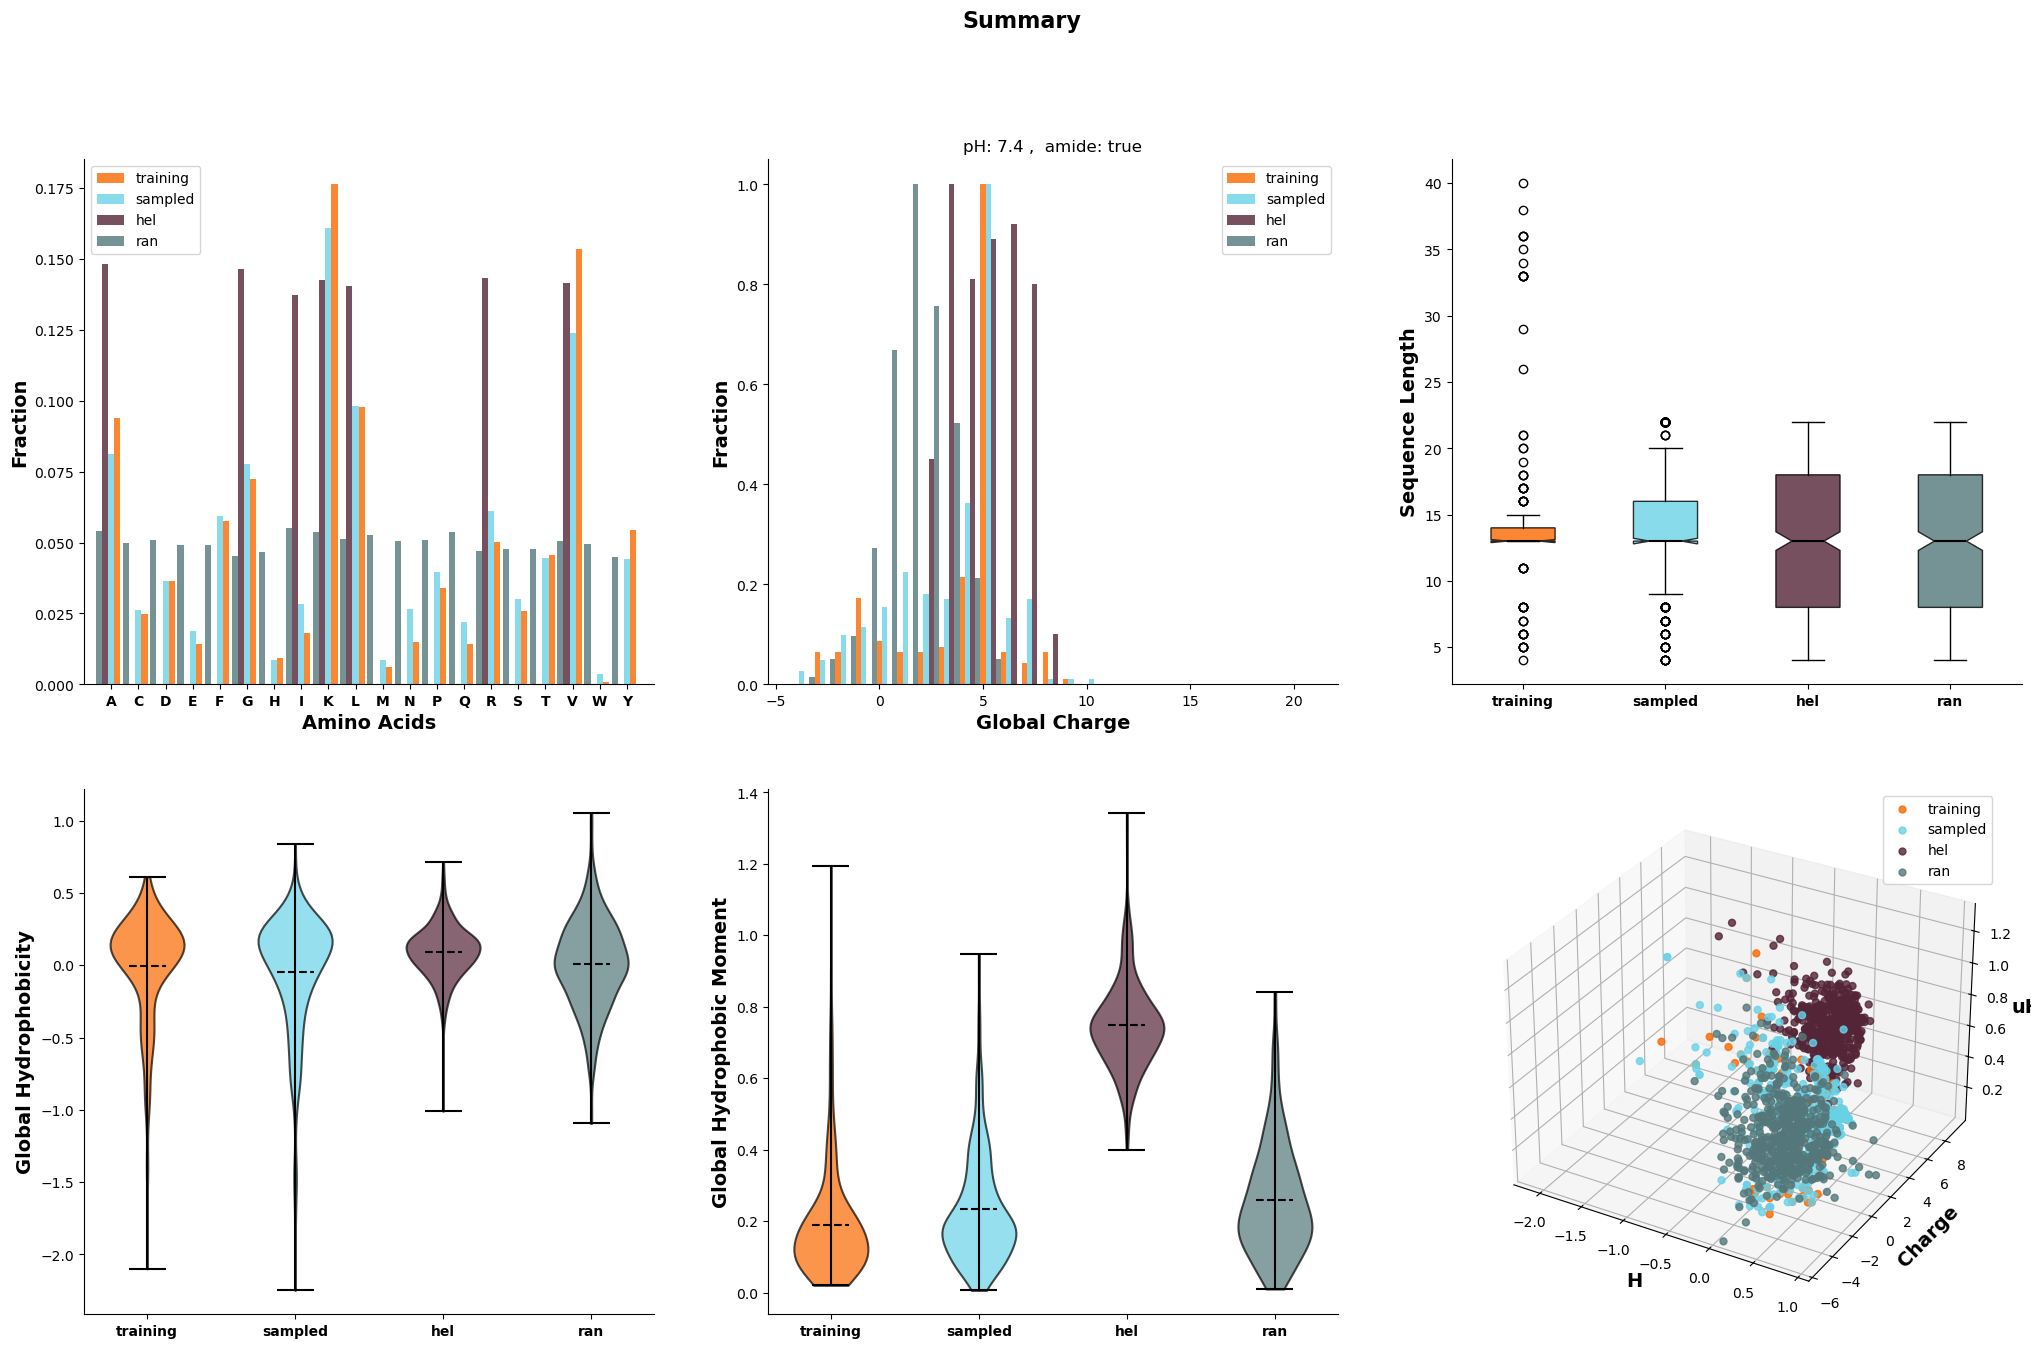

In [6]:
# 加载模型
finetune_model = load_model_instance('NS3_finetune_model/checkpoint/best_model_epochs.hdf5')

# 使用函数生成并保存数据
generate_and_save_data(finetune_model, finetune_data, sample = 500, startchar = "B", maxlen = 0, temp = 1.25)